<a href="https://colab.research.google.com/github/strahinja03/OM-Simulacija-Trke/blob/main/SeminarskiSimulacijaTrke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulacija Trke**

  U ovom projekatu će biti razvijen napredni model kretanja trkača tokom trke od 100m. Postepeno ćemo graditi model dodajući nove stvari kako bismo razvili realističan model za trku.

  Za početak ćemo proučiti najjednostavniji slučaj kada ćemo zanemariti stvari kao sto su sila otpora sredine i da što vise brzina raste pokretačka sila se smanjuje. <br>

  Postepeno ćemo dodavati bolje i preciznije aproksimacije u našu simulaciju kako bismo pokušali da stvorimo što realističniji simulaciju trke.

  Tako da za početak ulazni podaci koji su dati će biti da je početna sila F = 400N i da je masa trkača 80kg. Vrednosti ova dva ulazna podatka ćemo se držati do kraja.

### **Pozicija sprintera kao funkcija od vremena**

Za ovaj zadatak iskoristićemo drugi Njutnov zakon dinamike:
<br> <br>
<center> $\vec{F} = m ⋅ \vec{a}$</center>
<br> <br>
Uzećemo iste vrednosti za F i m.
S obzirom da je ubrzanje konstantno, možemo koristiti formulu za ravnomerno ubrzano kretanje kako pronašli promenu položaja trkača tokom vremena:
<br> <br>
<center> 𝒳(t) = 𝒳ₒ + ϑₒ ⋅ t + $\frac{a ⋅ t^2}{2}$ </center>
<br> <br>
𝒳(t) - Trenutna pozicija u trenutku t <br>
𝒳ₒ - Pocetni položaj <br>
ϑₒ - Početna brzina <br>
𝜶 - Ubrzanje sprintera <br>
U našem slučaju početna brzina će biti 0 jer sprinter počinje trku iz mesta.
Ubrzanje nalazimo korišćenjem prethodno pomenutog drugog Njutnovog zakona. I dobijamo da je ubrzanje 5$\frac{𝒎}{𝐬^2}$.

Sada ćemo iskoristiti formulu za položaj i nacrtati grafik.

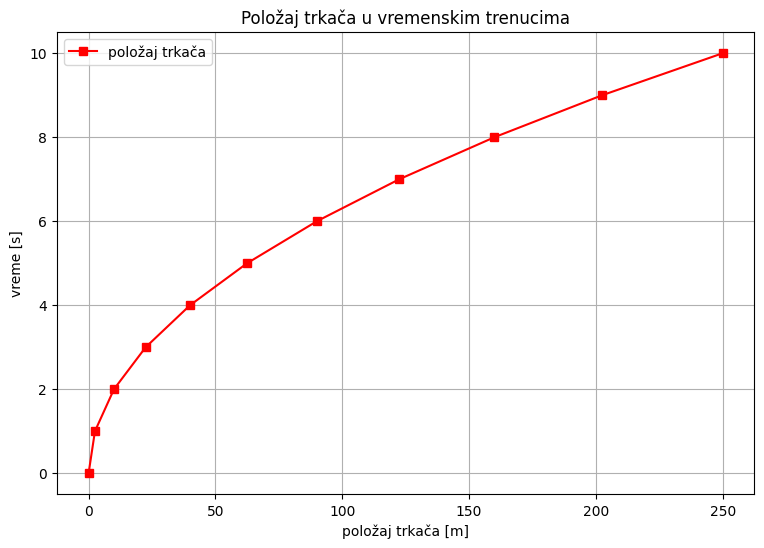

In [ ]:
# b)

import matplotlib.pyplot as plt

F = 400  # [N] - horizontalna pogonska sila
m = 80   # [kg] - masa trkača

a = F / m  # [m/s^2] - ubrzanje

# Funkcija za izračunavanje položaja trkaca u funkciji od vremena
def pozicija(t):
    # početni položaj
    x0 = 0
    return 0.5 * a * t**2

# Vremenski trenuci u sekundama
vremenski_trenuci = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Izračunavanje položaja trkača u svakom vremenskom trenutku
pozicije = [pozicija(t) for t in vremenski_trenuci]

plt.figure(figsize = (9, 6))
plt.plot(pozicije, vremenski_trenuci, marker = 's', color = 'r', label = 'položaj trkača')

plt.title('Položaj trkača u vremenskim trenucima')
plt.xlabel('položaj trkača [m]')
plt.ylabel('vreme [s]')

plt.grid(True)
plt.legend()
plt.show()


Sada nam je zadatak da pokažemo da ce sprinter u trenutku t = 6.3 preći 100m. Da bi proverili da li ovo važi treba da u formulu samo ubacimo naše ulazne podatke. Tako da pošto znamo da je udaljenost koju tražimo 100m a ubrzanje smo takođe ostalo nam je onda samo da rešavamo jednačino po t.

Dobijamo da je:
  <center> $t = \sqrt40$ ≈ 6.3 </center> <br>

In [ ]:
# c)

import math

# Vreme koje je potrebno trkaču da pretrči 100 m staze
t = math.sqrt(40)
print("Trkaču treba", round(t, 1), "sekunde da pretrči 100 m staze.")

Trkaču treba 6.3 sekunde da pretrči 100 m staze.


Naravno u realnom svetu postoji i sila otpora sredine. Tako da sada treba da uvedemo i tu silu u naše razmatranje.
<br>
<center> $𝐷 = \frac{1}{2}ρC_{D}A(v - w)^2$ </center>
<br>
ρ - Gustina vazduha (1.293$\frac{kg}{m^3}$) <br>
A - Površina preseka trkača (0.45m^2) <br>
$C_{D}$ - Koeficijent otpora (1.2) <br>
v - Brzina trkača <br>
w - Brzina vazduha <br>
Pretpostavićemo da je brzina vazduha 0$\frac{m}{s}$.

Sada želimo pod pretpostavkom da je trkač samo pod uticajem pokretačke sile F i otpora vazduha nađemo izraz za računanje ubrzanja trkača.<br>

Ukupna sila koja utiče na trkača je jednaka razlici F i D pa iz Drugog Njutnovog zakona važi jednakost:
<br> <br>
<center> $\vec{a} = \frac{\vec{F}-\vec{D}}{m}$ </center>
<br> <br>




In [ ]:

rho = 1.293
A = 0.45
CD = 1.2
w = 0

m = 80
F = 400
# Funkcija koja računa otpor vazduha pri brzyini v
def otpor_vazduha(v):
    return (1/2) * rho * CD * A * (v - w)**2
# Ubrzanje za brzinu v
def ubrzanje(v):
    D = otpor_vazduha(v)
    return (F - D) / m

# Za brzinu naprimer 8 m/s
v = 8

a = ubrzanje(v)
print(f"Ubrzanje trkača za brzinu {v} m/s je {a:.2f} m/s^2")


Ubrzanje trkača za brzinu 8 m/s je 4.72 m/s^2


### Primena Ojlerove metode
  Pomoću Ojlerove metode moguće je da nađemo funkcuje brzine i pozicije kao funkcije po vremenu. Uzećemo naravno da u trenutku $t_{0}$ = 0 kreće da trči iz mesta.

  Za Δt uzećemo da je njegova vrednost $10^{-2}$ kako bi izračunavanja bila odrađena u kratkom roku i kako bi dovoljno dobro aproksimirali vrednosti.

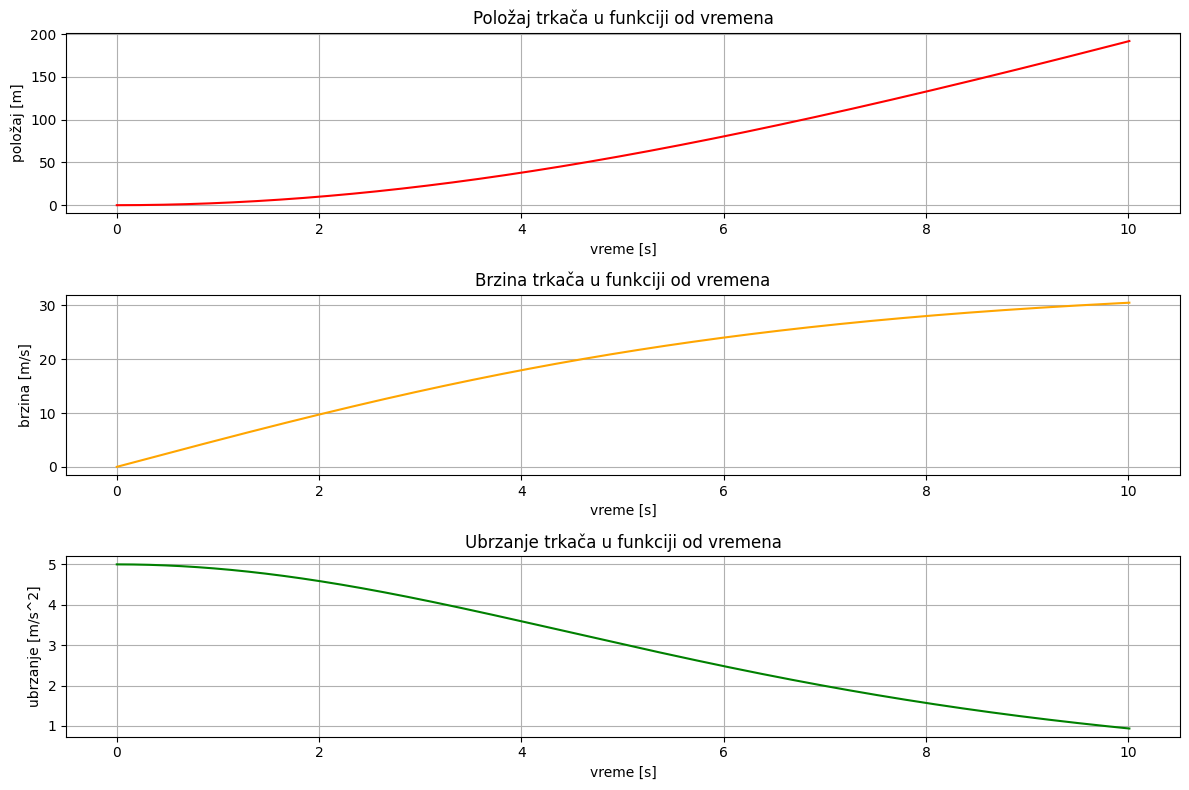

In [ ]:
# e)

import numpy as np
import matplotlib.pyplot as plt

# konstante
F = 400  # pogonska sila [N]
m = 80   # masa trkača [kg]
rho = 1.293  # gustina vazduha na nivou mora [kg/m^3]
A = 0.45   # presečna površina trkača [m^2]
Cd = 1.2   # koeficijent otpora vazduha
w = 0     # brzina vetra [m/s]
x0 = 0    # početni položaj [m]
v0 = 0    # početna brzina [m/s]
t0 = 0    # početno vreme [s]
t_kraj = 10  # krajnje vreme [s]
dt = 0.01  # korak vremena [s]

# Funkcija za ubrzanje
def ubrzanje(v):

    # otpor vazduha
    D = 0.5 * rho * Cd * A * (v - w) ** 2

    # ubrzanje
    a = (F - D) / m

    return a

# Ojlerova metoda za pronalaženje brzine i položaja
def ojlerov_metod():

    t = [t0]
    x = [x0]
    v = [v0]
    a = [ubrzanje(v0)]

    while t[-1] < t_kraj:
        v.append(v[-1] + a[-1] * dt)
        x.append(x[-1] + v[-1] * dt)
        a.append(ubrzanje(v[-1]))
        t.append(t[-1] + dt)

    return t, x, v, a

# Poziv funkcije za Ojlerovu metodu
t, x, v, a = ojlerov_metod()

# Plotovanje rezultata
plt.figure(figsize = (12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, x, 'red')
plt.title('Položaj trkača u funkciji od vremena')
plt.xlabel('vreme [s]')
plt.ylabel('položaj [m]')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, v, 'orange')
plt.title('Brzina trkača u funkciji od vremena')
plt.xlabel('vreme [s]')
plt.ylabel('brzina [m/s]')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, a, 'green')
plt.title('Ubrzanje trkača u funkciji od vremena')
plt.xlabel('vreme [s]')
plt.ylabel('ubrzanje [m/s^2]')
plt.grid(True)

plt.tight_layout()
plt.show()


### Pojam terminalne brzine

  Želimo da pokažemo da je terminalna brzina trkača, odnosno maksimalna brzina koju trkač može dostići jednaka:
  <br>
  <center> $𝑉_{T} = \sqrt{\frac{2F}{ρ C_{D}A}}$ </center>
  <br>
  Treba napomenuti da ne mora da znači da će trkač dostići ovu brzinu u 100m.
  Ovu maksimalnu brzinu zovemo i terminalnom jer u trenutku kada se dostigne ova brzina tada će ubrzanje biti jednako 0. Odnosno u trenutku terminalne brzine se intenziteti sila otpora sredine i sile pogona izjenače. Tako da imamo dve sile koje deluju u suportonom smeru istog intenziteta. Zato je tada ubrzanje u tom trenutku jednako 0.

  

In [ ]:
# g)

import numpy as np
import matplotlib.pyplot as plt

# konstante
F = 400  # [N] - horizontalna pogonska sila
rho = 1.293  # [kg/m^3] - gustina vazduha na nivou mora
Cd = 1.2  # koeficijent otpora
A = 0.45  # [m^2] - poprečni presek trkača

# Računamo teorijsku maksimalnu brzinu
V_T = np.sqrt(2 * F / (rho * Cd * A))

print("Teorijska maksimalna brzina trkača:", V_T, "m/s")

Teorijska maksimalna brzina trkača: 33.849234466965406 m/s


Naravno vidi se da teoretska maksimalna brzina nije realistična. Radi poređenja svetski rekord u trčanju na 100m je oko 9.58s, sto bi odgovaralo prosečnoj brzini 10.44$\frac{m}{s}$. <br>

Naravno jasno se vidi da je naša simulacija u ovom trenutku jos uvek veoma mnogo uproštena jer smo pretpostavili da na našeg trkača deluju samo dve sile.


1.   Pokretačka sila
2.   Sila otpora sredine(vazduha)

Želimo da dodamo neke stvari u model kako bi ga napravili više realističnijem. Možemo zaključiti da sto se brže krećemo to će manja biti pokretačka sila. Možemo našu simulaciju izmeniti tako sto ćemo zameniti konstantnu pokretačku silu sa vrednošću koja se smanjuje kako se brzina povećava. Uvodimo novu pokretačku silu $F_{D}$ koja će se sastojati iz dva dela:


1.   Konstante F
2.   Vrednosti koja se smanjuje kako se povećava brzina($F_{V})$

Za $F_{V} = -𝒇_VV$ <br>

Odatle imamo da je: <br> <center> $F_{D} = F + F_{V} = F - 𝒇_{V}V$ </center> <br>
Kako se brzina bude povećavala tako će se i $F_{D}$ smanjivati.



Može se dodati i jos činjenica da trkač kreće trku iz niskog starta i ima najveće ubrzanje, takođe će i u početnim trenutcima otpor sredine biti najmanji. Tako da onda imamo da će se ubrzanje postepeno smanjivati a otpor vazduha postepeno povećavati. <br> Uvodimo funkciju po $t$ gde je $t_{c}$ vreme za koje se dešavaju prethodno napomenute promene.
<br> <br>

<center> $F_{c} = 𝒇_{c}e^{-(\frac{t}{t_{c}})^2}$ </center>
<br>

Sada možemo da zaokružimo sve sto smo do sada uveli kao deo naše simulacije.

Prvo ćemo iskoristiti ranije uvedenu formulu gde smo uzimali da
je $F_{V}$ promena sile prilikom povećavanja brzine. Umesto njega sada uzimamo precizniju aproksimaciju koristeći $F_{c}$

**Pokretačka sila u trenutku $t$:** <br>

  <center> $F_{D} = F + 𝒇_{c}e^{-(\frac{t}{t_{c}})^2}$ </center>

Takođe smo zaključili da u početnim trenutcima otpor vazduha manji, tako da umesto da uzimamo neku konstantu $A$ kao površinu preseka trkača koja je konstanta uvodimo funkciju $A(t)$ koja će računati površinu preseka trkača u trenutku $t$.
<br> <br>
<center> $A(t) = A(1 - 0.25e^{-(\frac{t}{t_{c}})^2})$ </center>
<br>
A - površina preseka trkača kada je uspravan. <br>
Sada ubacujemo funkciju u formulu za izračunavanje otpora sredine(vazduha).

**Sila otpora vazduha u trenutku t**: <br>

<br>
<center> $D = \frac{1}{2}A(t)ρC_{D}(v - w)^2$ </center>
<br>

**Ukupna sila koja deluje na trkača u trenutku t:** <br>
<br>
<center> $F_{net} = F + F_{C} - F_{V} - D = F + 𝒇_{c}e^{-(\frac{t}{t_{c}})^2} - 𝒇_{v}V - D$ </center>
<br>
Gde je F = 400N



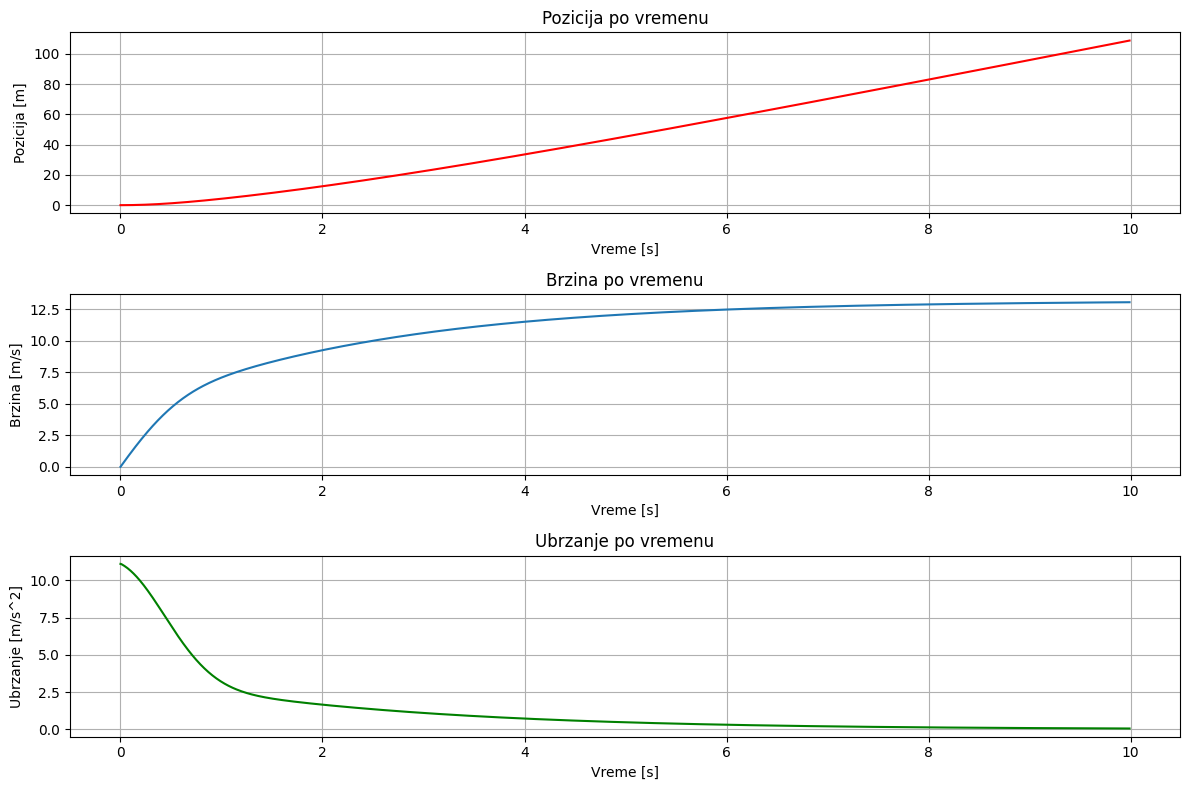

In [ ]:
# i)

import numpy as np
import matplotlib.pyplot as plt

# Konstante
F = 400
m = 80
fv = 25.8
fc = 488
tc = 0.67
A = 0.45
rho = 1.293
CD = 1.2
w = 0


v0 = 0
x0 = 0
t0 = 0
dt = 1e-2

def pokretackaSnaga(t, v):
    FD = F + fc * np.exp(-(t/tc)**2) - fv * v
    return FD

def otporVazduha(t, v):
    A_t = A * (1 - 0.25 * np.exp(-(t/tc)**2))
    D = 0.5 * A_t * rho * Cd * (v - w)**2
    return D

def ukupnaSilaKojaDelujeNaTrkaca(t, v):
    Fnet = pokretackaSnaga(t, v) - otporVazduha(t, v)
    return Fnet

t = np.arange(t0, 10, dt)
v = np.zeros_like(t)
x = np.zeros_like(t)

v[0] = v0
x[0] = x0

# Primanjujem Ojlerov metod ->
for i in range(1, len(t)):
    a = ukupnaSilaKojaDelujeNaTrkaca(t[i-1], v[i-1]) / m
    v[i] = v[i-1] + a * dt
    x[i] = x[i-1] + v[i-1] * dt

plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1)
plt.plot(t, x, 'r')
plt.grid('true')
plt.xlabel('Vreme [s]')
plt.ylabel('Pozicija [m]')
plt.title('Pozicija po vremenu')


plt.subplot(3, 1, 2)
plt.plot(t, v)
plt.grid('true')
plt.xlabel('Vreme [s]')
plt.ylabel('Brzina [m/s]')
plt.title('Brzina po vremenu')


plt.subplot(3, 1, 3)
a = np.gradient(v, dt)
plt.plot(t, a, 'g')
plt.xlabel('Vreme [s]')
plt.grid('true')
plt.ylabel('Ubrzanje [m/s^2]')
plt.title('Ubrzanje po vremenu')

plt.tight_layout()
plt.show()


In [ ]:
# i)

import numpy as np
import matplotlib.pyplot as plt

# Konstante
F = 400
m = 80
fv = 25.8
fc = 488
tc = 0.67
A = 0.45
rho = 1.293
Cd = 1.2
w = 0


v0 = 0
x0 = 0
t0 = 0
dt = 1e-2

def pokretackaSnaga(t, v):
    FD = F + fc * np.exp(-(t/tc)**2) - fv * v
    return FD

def otporVazduha(t, v):
    A_t = A * (1 - 0.25 * np.exp(-(t/tc)**2))
    D = 0.5 * A_t * rho * Cd * (v - w)**2
    return D

def ukupnaSilaKojaDelujeNaTrkaca(t, v):
    Fnet = pokretackaSnaga(t, v) - otporVazduha(t, v)
    return Fnet

t = np.arange(t0, 10, dt)
v = np.zeros_like(t)
x = np.zeros_like(t)

#ukupnoVreme = 0

v[0] = v0
x[0] = x0

# Primanjujem Ojlerov metod ->
for i in range(1, len(t)):
    a = ukupnaSilaKojaDelujeNaTrkaca(t[i-1], v[i-1]) / m
    v[i] = v[i-1] + a * dt
    x[i] = x[i-1] + v[i-1] * dt

vremeDo100m = np.argmax(np.array(x) >= 100)

#print(t[vremeDo100m])

print("Vreme potrebno trkaču da pretrči 100 m:", round(t[vremeDo100m], 2), "s")



9.32
Vreme potrebno trkaču da pretrči 100 m: 9.32 s
